In [9]:
# import pickle (pickle is similar to "serialize" whereas unpickle is similar to "deserialize")
import pickle as pc
# import matplotlib (used to visualize images)
import matplotlib.pyplot as plt

import pandas as pd
# import open-cv (used for image processing and computer vision, the alternative one could be Pillow)
import cv2
# import numpy
import numpy as np


In [10]:
# open pickle files and create training, testing and validation variable
with open('german-traffic-sign/train_data.p','rb') as file:
    train_data = pc.load(file)
with open('german-traffic-sign/test_data.p','rb') as file:
    test_data = pc.load(file)
with open('german-traffic-sign/valid_data.p','rb') as file:
    validation_data = pc.load(file)


In [11]:
# splitting data into train, test and validation data
x_train, y_train = train_data['features'],train_data['labels']
x_test, y_test = test_data['features'],test_data['labels']
x_val, y_val = validation_data['features'],validation_data['labels']


In [12]:
print(x_train.shape)
print(y_train.shape)

(34799, 32, 32, 3)
(34799,)


In [14]:
traffic_sign_data = pd.read_csv('german-traffic-sign/traffic_signnames.csv')
print(traffic_sign_data)
print('\n\n---------Data Description------')
traffic_sign_data.describe()

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

,ClassId
count,43.000000
mean,21.000000
std,12.556539
min,0.000000
25%,10.500000
50%,21.000000
75%,31.500000
max,42.000000


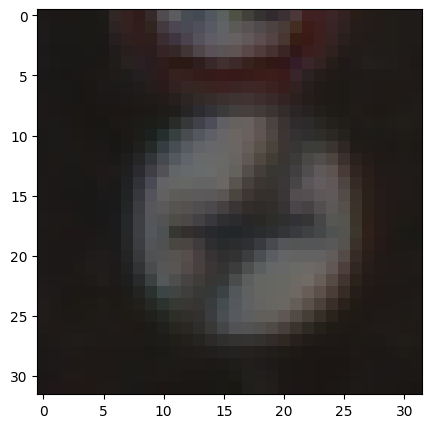

(32, 32, 3)


In [15]:
# display image with matplotlib
plt.figure(figsize=(5,5))
plt.imshow(x_train[0])
plt.show()
print(x_train[0].shape)

In [16]:
# preprocessing
def preprocessing(image):
    # converting to gray scale. OpenCV uses BLUE,GREEN, RED (BGR) format whereas pillow uses RGB 
    gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    # Equalizing
    equalize_img = cv2.equalizeHist(gray_img)

    # normalizing images
    norm_img = equalize_img /255
    return norm_img
    
    

In [17]:
# preprocessing entire dataset.
x_train = np.array(list(map(preprocessing,x_train)))
x_val = np.array(list(map(preprocessing,x_val)))
x_test = np.array(list(map(preprocessing,x_test)))

(32, 32)


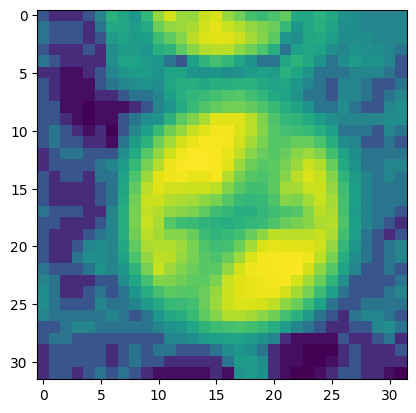

In [18]:
# display newly preprocessed image
plt.imshow(x_train[0])
print(x_train[0].shape)

In [31]:
# importing libraries/computer vision frameworks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [32]:
# converting the labels into categorical variables
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y_train,43)
y_cat_test = to_categorical(y_test,43)
y_cat_val = to_categorical(y_val,43)

# reshaping the images

x_train = x_train.reshape(34799, 32, 32, 1)
x_test = x_test.reshape(12630,32,32,1)
x_val = x_val.reshape(4410,32,32,1)

In [33]:
# creating model

model = tf.keras.Sequential([
    layers.Conv2D(30,(5,5), input_shape=(32,32,1), activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(15,(3,3), activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(500, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(43, activation="softmax"),
    
])

In [53]:
# adding cross-entropy loss and accuracy metric to the model
#Compiling the neural network
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 30)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 15)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 540)               0         
                                                                 
 dense (Dense)               (None, 500)               2

In [54]:
#Fitting the data to the training dataset
history = model.fit(
    x_train, y_cat_train,
    batch_size=512,
    epochs=25,
    verbose=1,
    shuffle=1
)

Epoch 1/25
68/68 [==============================] - 4s 45ms/step - loss: 0.0285 - accuracy: 0.9911
Epoch 2/25
68/68 [==============================] - 3s 44ms/step - loss: 0.0245 - accuracy: 0.9926
Epoch 3/25
68/68 [==============================] - 3s 43ms/step - loss: 0.0225 - accuracy: 0.9928
Epoch 4/25
68/68 [==============================] - 3s 46ms/step - loss: 0.0244 - accuracy: 0.9923
Epoch 5/25
68/68 [==============================] - 6s 81ms/step - loss: 0.0225 - accuracy: 0.9928
Epoch 6/25
68/68 [==============================] - 5s 73ms/step - loss: 0.0183 - accuracy: 0.9942
Epoch 7/25
68/68 [==============================] - 5s 68ms/step - loss: 0.0213 - accuracy: 0.9931
Epoch 8/25
68/68 [==============================] - 4s 64ms/step - loss: 0.0188 - accuracy: 0.9939
Epoch 9/25
68/68 [==============================] - 5s 68ms/step - loss: 0.0193 - accuracy: 0.9934
Epoch 10/25
68/68 [==============================] - 5s 72ms/step - loss: 0.0170 - accuracy: 0.9948
Epoch 11/

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [59]:
prediction = (model.predict(x_test) > 0.5).astype("int32")

395/395 [==============================] - 2s 5ms/step


In [72]:
# N.B : could not print classification report, confusion_matrix
#tf.keras.saving.save_model("model.keras")
model.save('traffic_sign_classificion.h5')
model.save('model.keras')